# Task-5: Exploratory Data Analysis

### Submitted by : SOYABUL ISLAM


<p>Here I am going to analyze data with visual representation. We will see how products in different regions and states were sold and amde profit.How different factores change the perception in products Sales and Profits.
<br>Importing necessary libraries to visualize data and read dataset</p>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
superstore= pd.read_csv("SampleSuperstore.csv")
superstore

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Checking the data types of every columns of the dataset with th ehelp of info function

In [4]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## <span style="color:blue">There are no NULL values in the dataset. </span>

In [7]:
superstore.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

<p style="font-size: 140%; "><b> I am removing Country and Postal Code columns. It will not effect the results. The correlation will seem more accurate.</b> </p>

In [8]:
superstore.drop_duplicates(inplace=True)
superstore=superstore.drop(['Country','Postal Code'], axis=1)

In [9]:
correlation=superstore.corr(method='kendall')
correlation

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.239052,-0.042005,0.451991
Quantity,0.239052,1.000000,-0.000424,0.171642
Discount,-0.042005,-0.000424,1.000000,-0.428303
Profit,0.451991,0.171642,-0.428303,1.000000


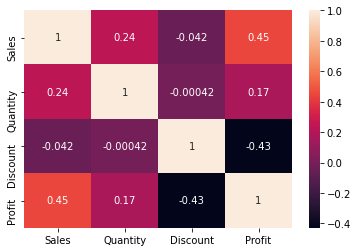

In [10]:
sns.heatmap(correlation, xticklabels= correlation.columns, yticklabels= correlation.columns, annot= True,)

## <span style="color:blue">Pie Chart </span>

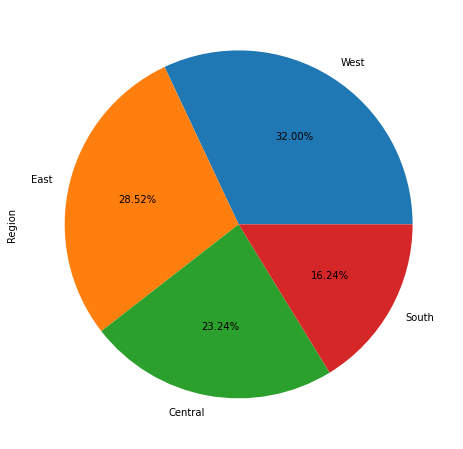

In [11]:
plt.figure(figsize=(8,8))
superstore['Region'].value_counts().plot.pie(autopct='%1.2f%%')

<p style="font-size: 140%; "><b> About 32% of the cities are in West region. Second largerst region is East. The Central and South region comes as follows. </b> </p>

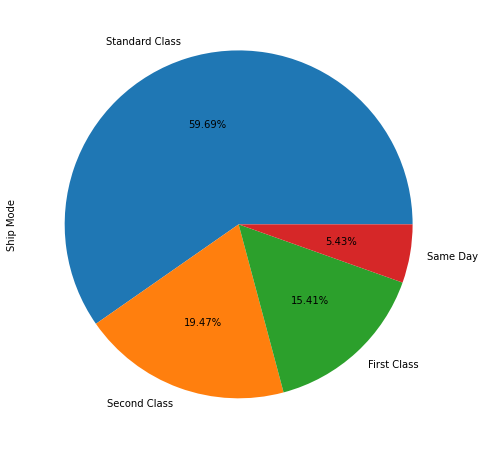

In [13]:
plt.figure(figsize=(8,8))
superstore['Ship Mode'].value_counts().plot.pie(autopct='%1.2f%%')

In [14]:
for col in superstore.columns:
    if superstore[col].dtype=='object':
        print(f'Unique {col} number is {superstore[col].nunique()}')
        print("---------------------------------")

Unique Ship Mode number is 4
---------------------------------
Unique Segment number is 3
---------------------------------
Unique City number is 531
---------------------------------
Unique State number is 49
---------------------------------
Unique Region number is 4
---------------------------------
Unique Category number is 3
---------------------------------
Unique Sub-Category number is 17
---------------------------------


## <span style="color: green">Pairplot of data considering Category and Region as hue</span>

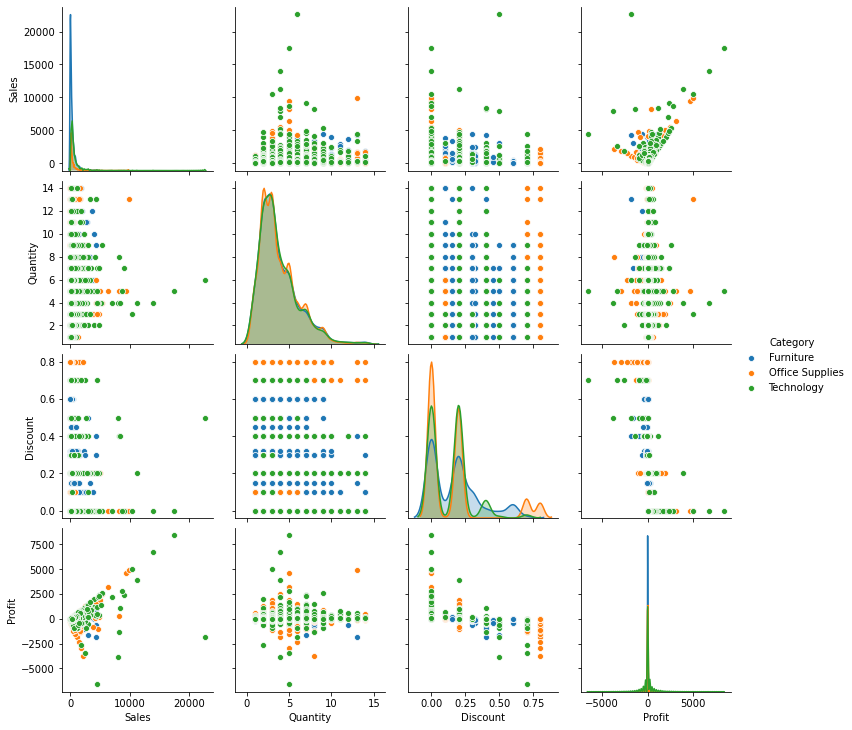

In [15]:
sns.pairplot(superstore, hue='Category')

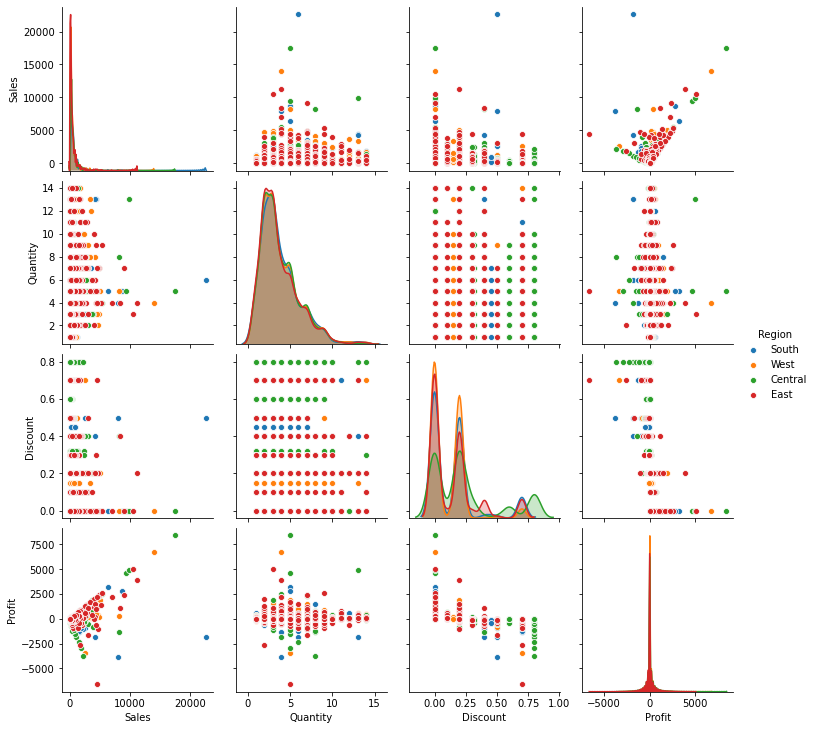

In [16]:
sns.pairplot(superstore, hue='Region')

<p style="font-size: 160%"><b>I have grouped superstore data according to category to see which product is being sold most and to visulaize.</b></p>


In [81]:
cat_group= superstore.groupby("Category")
total_quantity_sold= cat_group["Quantity"].agg(np.sum).sort_values(ascending= False).reset_index()
total_quantity_sold

,Category,Quantity
0,Office Supplies,22861
1,Furniture,8020
2,Technology,6939


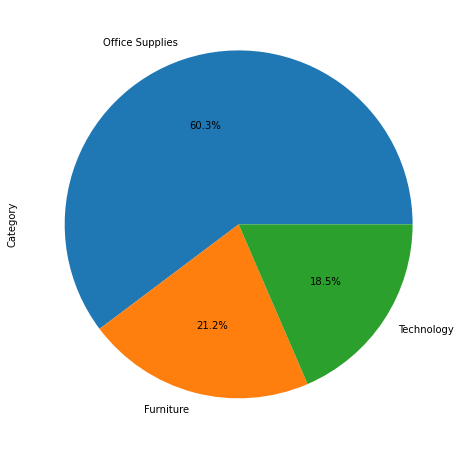

In [12]:
plt.figure(figsize=(8,8))
superstore['Category'].value_counts().plot.pie(autopct='%1.1f%%')

<p style="font-size: 160%"><b>From the output table and pie chart above, we can see that office supplies products have been in the top with total quantity of 22861 , which is 60.3% of the total product sold.</b></p>


In [82]:
subcat_group= superstore.groupby("Sub-Category")
total_quantity_sold= subcat_group["Quantity"].agg(np.sum).sort_values(ascending= False).reset_index()
total_quantity_sold

,Sub-Category,Quantity
0,Binders,5971
1,Paper,5144
2,Furnishings,3560
3,Phones,3289
4,Storage,3158
5,Art,2996
6,Accessories,2976
7,Chairs,2351
8,Appliances,1729
9,Labels,1396


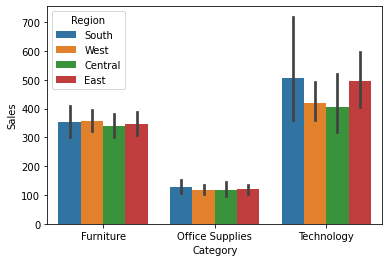

In [17]:
sns.barplot(x='Category', y='Sales', hue='Region', data= superstore, )


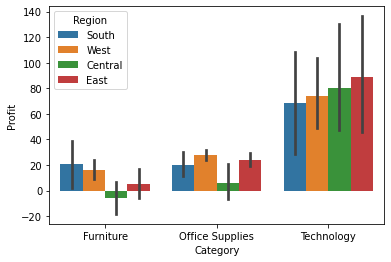

In [18]:
sns.barplot(x='Category', y='Profit', hue='Region', data= superstore, )

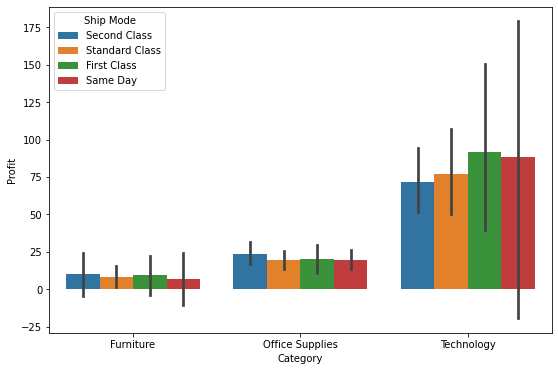

In [55]:
plt.figure(figsize=(9,6))
sns.barplot(x='Category', y='Profit', hue='Ship Mode', data= superstore, )

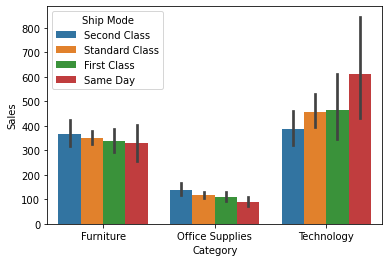

In [20]:
plt.figure(figsize=(9,6))
sns.barplot(x='Category', y='Sales', hue='Ship Mode', data= superstore, )

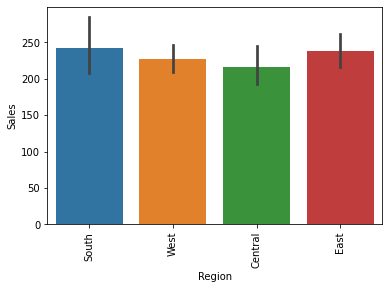

In [21]:
data=sns.barplot(x='Region', y='Sales', data= superstore,)
for item in data.get_xticklabels():
    item.set_rotation(90)

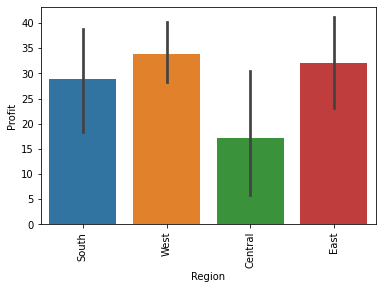

In [22]:
data=sns.barplot(x='Region', y='Profit', data= superstore,)
for item in data.get_xticklabels():
    item.set_rotation(90)

<p style="font-size: 160%"><b>From four barchart shown above, it seems that technology products dominates in Sales, profits according to ship mode and region.</b></p>
<p style="font-size: 120%"><b>Lets sub-categorize Technology and see which subcategory dominates others in Sales, Profits according to Region, Ship_mode </b></p>

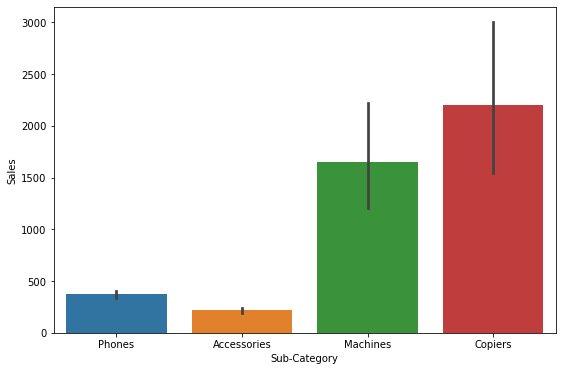

In [104]:
tech_data= superstore[superstore['Category']=='Technology']
plt.figure(figsize=(9,6))
sns.barplot(x='Sub-Category', y='Sales',  data= tech_data, )

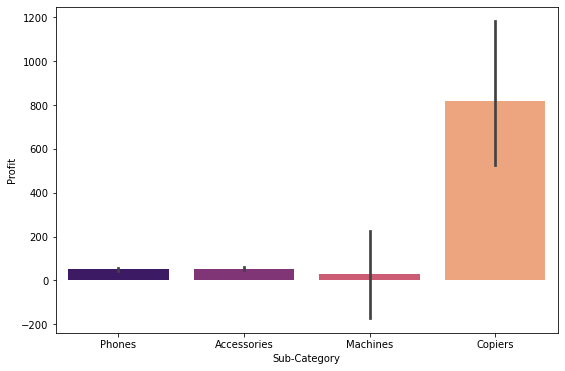

In [65]:
plt.figure(figsize=(9,6))
sns.barplot(x='Sub-Category', y='Profit', data= tech_data,palette='magma' )

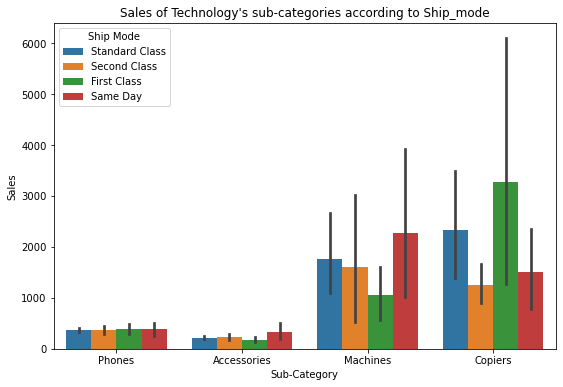

In [106]:


plt.figure(figsize=(9,6))
plt.title("Sales of Technology's sub-categories according to Ship_mode")
sns.barplot(x='Sub-Category', y='Sales', hue='Ship Mode', data= tech_data, )

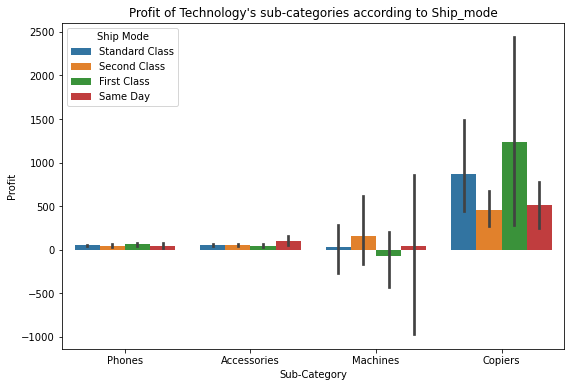

In [103]:

plt.figure(figsize=(9,6))
plt.title("Profit of Technology's sub-categories according to Ship_mode")
sns.barplot(x='Sub-Category', y='Profit', hue='Ship Mode', data= tech_data, )


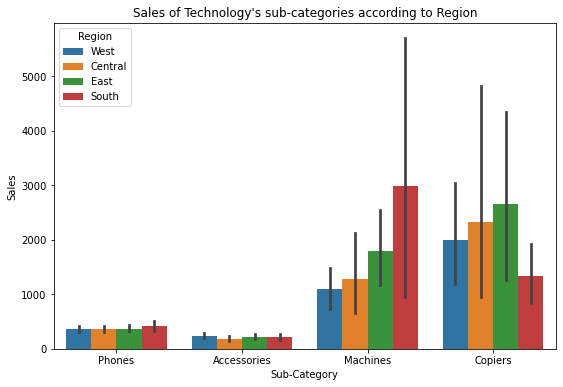

In [107]:
plt.figure(figsize=(9,6))
plt.title("Sales of Technology's sub-categories according to Region")
sns.barplot(x='Sub-Category', y='Sales', hue='Region', data= tech_data, )

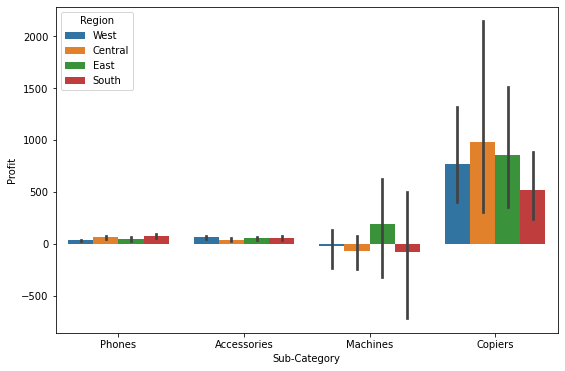

In [60]:
plt.figure(figsize=(9,6))
plt.title("Profit of Technology's sub-categories according to Region")
sns.barplot(x='Sub-Category', y='Profit', hue='Region', data= tech_data, )

  <p style="font-size: 160%"><b>Grouping dataset according to Cities to see which ity makes highest and lowest total Sales and profits </b></p>

In [23]:
city_group= superstore.groupby("City")
top_sales_among_cities= city_group["Sales"].agg(np.sum).sort_values(ascending= False).reset_index()
top_sales_among_cities

,City,Sales
0,New York City,256319.041
1,Los Angeles,175831.901
2,Seattle,119460.282
3,San Francisco,112577.172
4,Philadelphia,109061.461
...,...,...
526,Ormond Beach,2.808
527,Pensacola,2.214
528,Jupiter,2.064
529,Elyria,1.824


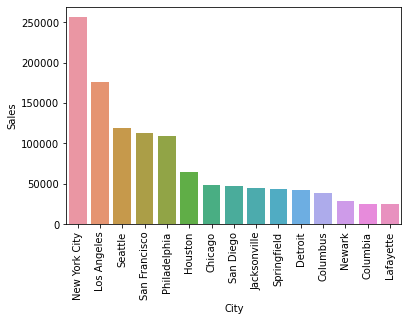

In [24]:
sales_bar=sns.barplot(x='City', y='Sales', data=top_sales_among_cities.head(15))
for item in sales_bar.get_xticklabels():
    item.set_rotation(90)

In [25]:
top_sales_among_cities= city_group["Profit"].agg(np.sum).sort_values(ascending= False).reset_index()
top_sales_among_cities

,City,Profit
0,New York City,62013.8973
1,Los Angeles,30431.4267
2,Seattle,29121.6825
3,San Francisco,17466.1186
4,Detroit,13146.6935
...,...,...
526,Chicago,-6648.3318
527,Lancaster,-7239.0684
528,San Antonio,-7299.0502
529,Houston,-10175.1755


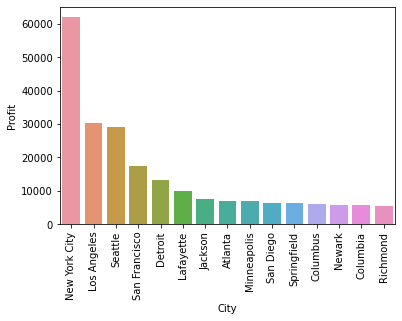

In [26]:
profit_bar=sns.barplot(x='City', y='Profit', data=top_sales_among_cities.head(15))
for item in profit_bar.get_xticklabels():
    item.set_rotation(90)

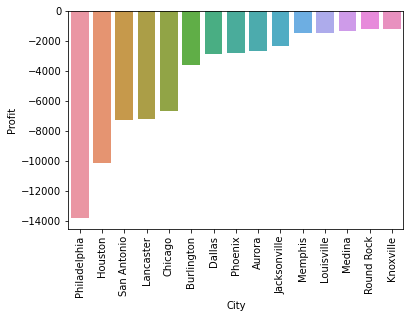

In [53]:
profit_bar_tail=sns.barplot(x='City', y='Profit', data=top_sales_among_cities.sort_values(by='Profit',ascending=True).head(15))
for item in profit_bar_tail.get_xticklabels():
    item.set_rotation(90)

In [33]:
average_sale=city_group['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()
average_profit=city_group['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()
average_discount=city_group['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()
print(f'Average Sale:   ')
print('-----------------------')
print(average_sale.head())
print(f'Average Profit:  ')
print('-----------------------')
print(average_profit.head())
print(f'Average Discount:  ')
print('-----------------------')
print(average_discount.head())

Average Sale:   
-----------------------
           City        Sales
0     Jamestown  2354.395000
1      Cheyenne  1603.136000
2    Bellingham  1263.413333
3  Independence  1208.685000
4       Burbank  1082.386000
Average Profit:  
-----------------------
           City      Profit
0     Jamestown  642.885750
1  Independence  487.831500
2     Lafayette  323.173794
3   Minneapolis  296.721070
4      Appleton  277.383150
Average Discount:  
-----------------------
            City  Discount
0      Deer Park       0.8
1        Abilene       0.8
2  Missouri City       0.8
3     Romeoville       0.8
4      Littleton       0.7


In [35]:
high_sales= average_sale[average_sale['Sales']> 600]
low_sales= average_sale[average_sale['Sales']<= 50 ]


high_profit= average_profit[average_profit['Profit']> 100]
low_profit= average_profit[average_profit['Profit']<= 0]


high_discount= average_discount[average_discount['Discount']>= 0.6]
low_discount= average_discount[average_discount['Discount']< 0.6]


In [36]:
high_sale_and_profit= pd.merge(high_sales,high_profit, on=['City'], how='inner')
high_sale_and_profit

,City,Sales,Profit
0,Jamestown,2354.395000,642.885750
1,Cheyenne,1603.136000,100.196000
2,Bellingham,1263.413333,203.530267
3,Independence,1208.685000,487.831500
4,Burbank,1082.386000,254.844600
5,Beverly,861.063333,218.306467
6,Appleton,835.655000,277.383150
7,Lafayette,807.619355,323.173794
8,Torrance,783.067000,136.287750
9,Lehi,758.363000,225.831300


In [39]:
low_sale_and_profit= pd.merge(low_sales,low_profit, on=['City'], how='inner')
low_sale_and_profit

,City,Sales,Profit
0,Frankfort,48.816000,-13.028000
1,Mcallen,45.616632,-8.624826
2,Bolingbrook,36.384667,-0.776833
3,Mason,31.421333,-1.411733
4,Frisco,28.752000,-9.400800
5,Corpus Christi,27.568000,-5.466300
6,San Marcos,27.111000,-4.835325
7,Tinley Park,22.288000,-8.915200
8,Boca Raton,21.002667,-7.548533
9,Hickory,20.382000,-0.547800


In [42]:
high_sale_low_profit= pd.merge(high_sales,low_profit, on=['City'], how='inner')
high_sale_low_profit

,City,Sales,Profit
0,Burlington,866.723280,-144.915088
1,Round Rock,693.436114,-169.061614
2,Richardson,644.232000,-12.244650


In [44]:
high_sale_low_discount= pd.merge(high_sales,low_discount, on=['City'], how='inner')
high_sale_low_discount

,City,Sales,Discount
0,Jamestown,2354.395000,0.000000
1,Cheyenne,1603.136000,0.200000
2,Bellingham,1263.413333,0.066667
3,Independence,1208.685000,0.000000
4,Burbank,1082.386000,0.066667
5,Buffalo,906.349600,0.060000
6,Burlington,866.723280,0.136000
7,Beverly,861.063333,0.000000
8,Sparks,853.986667,0.066667
9,Appleton,835.655000,0.000000


In [51]:
high_profit_low_discount= pd.merge(high_profit,low_discount, on=['City'], how='inner')
high_profit_low_discount

,City,Profit,Discount
0,Jamestown,642.885750,0.000000
1,Independence,487.831500,0.000000
2,Lafayette,323.173794,0.000000
3,Minneapolis,296.721070,0.000000
4,Appleton,277.383150,0.000000
5,Morristown,262.603871,0.000000
6,Burbank,254.844600,0.066667
7,Lehi,225.831300,0.100000
8,Beverly,218.306467,0.000000
9,Warwick,212.759120,0.000000


In [47]:
low_sale_high_discount= pd.merge(low_sales,high_discount, on=['City'], how='inner')
low_sale_high_discount

,City,Sales,Discount
0,Tinley Park,22.288,0.6
1,Romeoville,8.952,0.8
2,Deer Park,6.924,0.8
3,Missouri City,6.370,0.8
4,Ormond Beach,2.808,0.7
5,Pensacola,2.214,0.7
6,Elyria,1.824,0.7
7,Abilene,1.392,0.8


  <p style="font-size: 160%"><b>Grouping dataset according to Sub_categories to see which ity makes highest and lowest total Sales and profits </b></p>

In [28]:
subcat_group= superstore.groupby("Sub-Category")
top_sales_among_sub_cat= subcat_group["Sales"].agg(np.sum).sort_values(ascending= False).reset_index()
top_sales_among_sub_cat

,Sub-Category,Sales
0,Phones,330007.0540
1,Chairs,327777.7610
2,Storage,223843.6080
3,Tables,206965.5320
4,Binders,203409.1690
5,Machines,189238.6310
6,Accessories,167380.3180
7,Copiers,149528.0300
8,Bookcases,114879.9963
9,Appliances,107532.1610


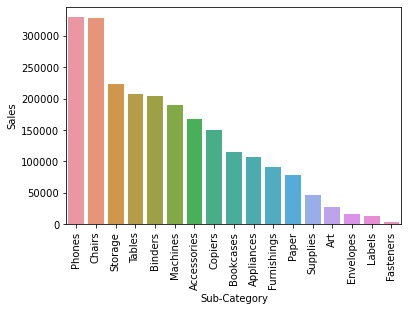

In [29]:
sales_bar=sns.barplot(x='Sub-Category', y='Sales', data=top_sales_among_sub_cat)
for item in sales_bar.get_xticklabels():
    item.set_rotation(90)

In [30]:
top_sales_among_sub_cat= subcat_group["Profit"].agg(np.sum).sort_values(ascending= False).reset_index()
top_sales_among_sub_cat

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,33944.2395
4,Binders,30228.0003
5,Chairs,26567.1278
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13052.7230
9,Envelopes,6964.1767


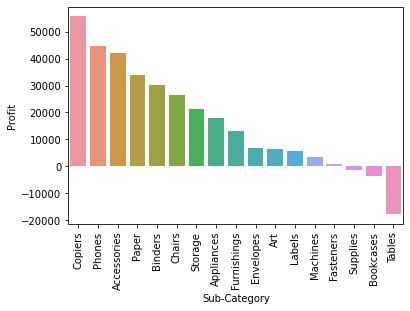

In [32]:
profit_bar=sns.barplot(x='Sub-Category', y='Profit', data=top_sales_among_sub_cat)
for item in profit_bar.get_xticklabels():
    item.set_rotation(90)

In [72]:
top_discount_among_sub_cat= subcat_group["Discount"].agg(np.mean).sort_values(ascending= False).reset_index()
top_discount_among_sub_cat


,Sub-Category,Discount
0,Binders,0.372011
1,Machines,0.306087
2,Tables,0.261285
3,Bookcases,0.211140
4,Chairs,0.170244
5,Appliances,0.166524
6,Copiers,0.161765
7,Phones,0.154556
8,Furnishings,0.138494
9,Fasteners,0.082028


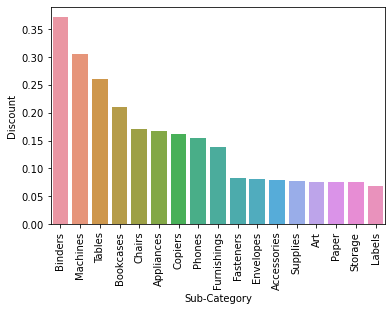

In [74]:
discount_bar=sns.barplot(x='Sub-Category', y='Discount', data=top_discount_among_sub_cat)
for item in discount_bar.get_xticklabels():
    item.set_rotation(90)

In [101]:
sub_average_sale=subcat_group['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()
sub_average_profit=subcat_group['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()
sub_average_discount=subcat_group['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()
print('=== On the basis of Sub-Category ===')
print(f'Average Sale :   ')
print('-----------------------------')
print(sub_average_sale)
print(f'Average Profit:  ')
print('-----------------------------')
print(sub_average_profit)
print(f'Average Discount:  ')
print('-----------------------------')
print(sub_average_discount)

=== On the basis of Sub-Category ===
Average Sale :   
-----------------------------
   Sub-Category        Sales
0       Copiers  2198.941618
1      Machines  1645.553313
2        Tables   648.794771
3        Chairs   532.971969
4     Bookcases   503.859633
5        Phones   371.211534
6       Storage   264.590553
7      Supplies   245.650200
8    Appliances   230.755710
9   Accessories   215.974604
10      Binders   133.645972
11  Furnishings    95.902745
12    Envelopes    64.867724
13        Paper    57.560075
14       Labels    34.283504
15          Art    34.096896
16    Fasteners    13.936774
Average Profit:  
-----------------------------
   Sub-Category      Profit
0       Copiers  817.909190
1   Accessories   54.111788
2        Phones   50.073938
3        Chairs   43.198582
4    Appliances   38.922758
5      Machines   29.432669
6     Envelopes   27.418019
7       Storage   25.152277
8         Paper   24.977365
9       Binders   19.860710
10       Labels   15.224193
11  Furni

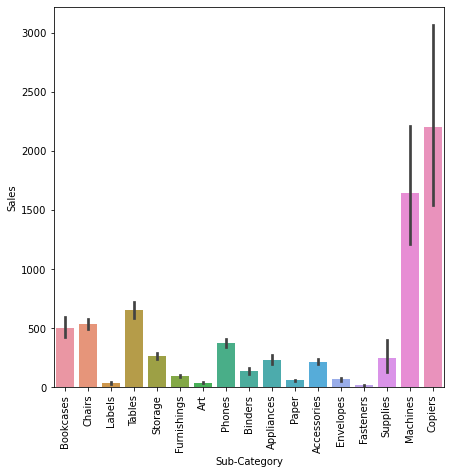

In [167]:
plt.figure(figsize=(7,7))
data=sns.barplot(x='Sub-Category', y='Sales', data= superstore,)
for item in data.get_xticklabels():
    item.set_rotation(90)

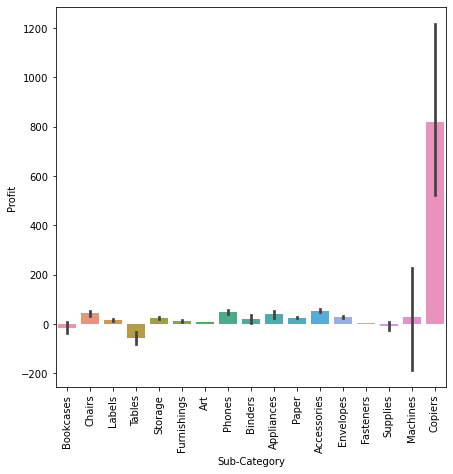

In [168]:
plt.figure(figsize=(7,7))
data=sns.barplot(x='Sub-Category', y='Profit', data= superstore,)
for item in data.get_xticklabels():
    item.set_rotation(90)

In [96]:
sub_high_sales= sub_average_sale[average_sale['Sales']> 100]
sub_low_sales= sub_average_sale[average_sale['Sales']<= 50 ]


sub_high_profit= sub_average_profit[average_profit['Profit']> 20]
sub_low_profit= sub_average_profit[average_profit['Profit']<= 0]


sub_high_discount= sub_average_discount[average_discount['Discount']>= 0.6]
sub_low_discount= sub_average_discount[average_discount['Discount']< 0.6]

In [108]:
sub_high_sale_high_profit= pd.merge(sub_high_sales,sub_high_profit, on=['Sub-Category'], how='inner')
sub_high_sale_high_profit

,Sub-Category,Sales,Profit
0,Copiers,2198.941618,817.909190
1,Machines,1645.553313,29.432669
2,Chairs,532.971969,43.198582
3,Phones,371.211534,50.073938
4,Storage,264.590553,25.152277
5,Appliances,230.755710,38.922758
6,Accessories,215.974604,54.111788


In [98]:
sub_high_sale_low_profit= pd.merge(sub_high_sales,sub_low_profit, on=['Sub-Category'], how='inner')
sub_high_sale_low_profit

,Sub-Category,Sales,Profit
0,Tables,648.794771,-55.565771
1,Bookcases,503.859633,-15.230509
2,Supplies,245.650200,-6.258418


In [99]:
sub_high_sale_low_discount= pd.merge(sub_high_sales,sub_low_discount, on=['Sub-Category'], how='inner')
sub_high_sale_low_discount

,Sub-Category,Sales,Discount
0,Copiers,2198.941618,0.161765
1,Machines,1645.553313,0.306087
2,Tables,648.794771,0.261285
3,Chairs,532.971969,0.170244
4,Bookcases,503.859633,0.211140
5,Phones,371.211534,0.154556
6,Storage,264.590553,0.074704
7,Supplies,245.650200,0.076842
8,Appliances,230.755710,0.166524
9,Accessories,215.974604,0.078452


In [100]:
sub_high_profit_low_discount= pd.merge(sub_high_profit,sub_low_discount, on=['Sub-Category'], how='inner')
sub_high_profit_low_discount

,Sub-Category,Profit,Discount
0,Copiers,817.909190,0.161765
1,Accessories,54.111788,0.078452
2,Phones,50.073938,0.154556
3,Chairs,43.198582,0.170244
4,Appliances,38.922758,0.166524
5,Machines,29.432669,0.306087
6,Envelopes,27.418019,0.080315
7,Storage,25.152277,0.074704
8,Paper,24.977365,0.074908


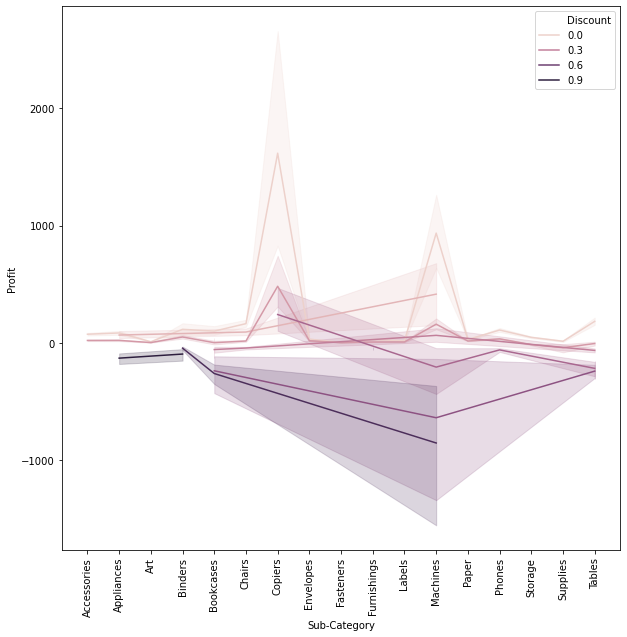

In [107]:
plt.figure(figsize=(10,10))
line=sns.lineplot(x='Sub-Category', y='Profit', hue='Discount', data= superstore)
for item in line.get_xticklabels():
    item.set_rotation(90)

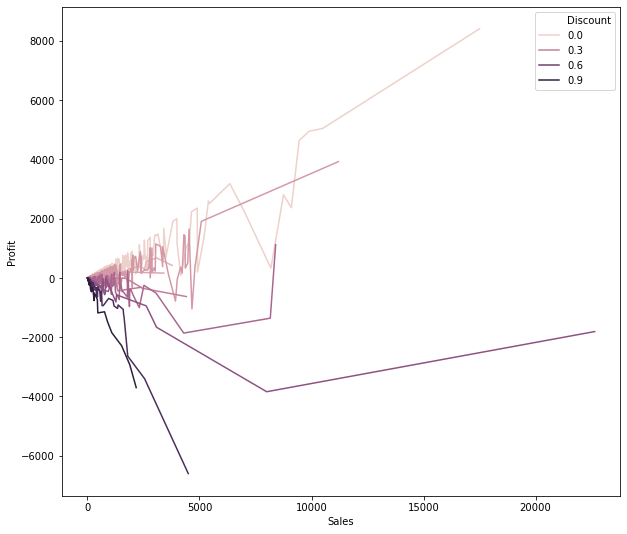

In [78]:
plt.figure(figsize=(10,9))
sns.lineplot(x='Sales', y='Profit', hue='Discount', data= superstore)

## <span style="color:blue">From this visualization: </span>
  <span style="color:blue"><ol>
    <li>For Discount=0.0, the profit scale goes very high </li>
    <li>For discount more than 0 or we may say 10,20 or 30% discount the profit is good but not the best. </li>
    <li>For profit between 0.3 to 0.6  sales rate gets very high but it seems that the profit is not goos, sometimes it takes a lot loss when the sale is low.</li>
    <li>For discount More than 0.6 the loss is very high , there has no profit and sale is also low</li>
    </ol></span>

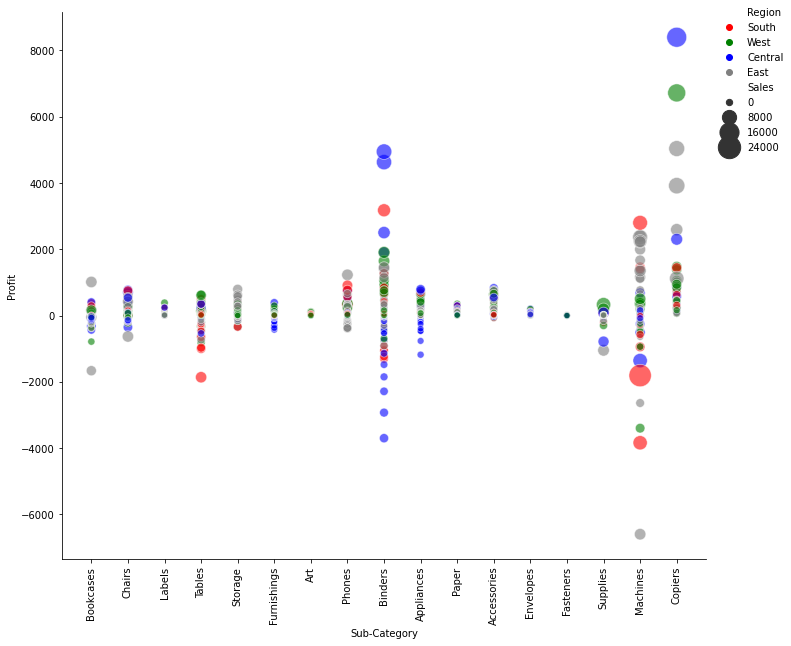

In [65]:
relplot=sns.relplot(x="Sub-Category", y="Profit", hue="Region", size="Sales",
            sizes=(40,500), alpha=.6, palette=['r','g','b','gray'],
            height=9, aspect=1, data=superstore)
leg = relplot._legend
leg.set_bbox_to_anchor([1.1,1]) 
leg._loc = 1
for axes in relplot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()


  <p style="font-size: 160%"><b>As a summary we can say that, Office suppliy products have highest quantity of items sold, on the other hand technology is in the bottom. But In total sales and Profits technology related items surpasses every other category . Among technology category copeirs makes highest sales and profits. Phones and other accessories remain in stable position but Machines have least profits and it has high tendancy to have loss. If we look at Regions, South region dominates in sales whereas west dominates in profit scale.New work city have highest sales and profits.Philadelphia report highest total loss of about -13843.2106 though it was fifth position in sales. </b></p>